In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import joblib

In [145]:
file_path = "/Users/mukxsh/SmartHiring/INT234_CA2.csv"
df = pd.read_csv(file_path)

In [146]:
df.head()

,experience_years,test_score,interview_score,communication,performance_score,hire_decision,degree,city,application_source,hobby,preferred_language
0,5.00,59,7,1,47,Reject,MCA,Mumbai,Campus,Gaming,English
1,8.64,81,10,2,69,Hold,M.Tech,Kolkata,Campus,Reading,Spanish
2,0.00,76,6,4,55,Hold,BCA,Bangalore,Indeed,Sports,French
3,3.63,69,2,2,36,Reject,BCA,Delhi,Referral,Reading,French
4,1.76,62,7,10,63,Hold,MCA,Pune,Referral,Reading,Hindi


In [147]:
df.tail()

,experience_years,test_score,interview_score,communication,performance_score,hire_decision,degree,city,application_source,hobby,preferred_language
3995,8.51,23,2,8,39,Reject,MCA,Pune,Website,Photography,German
3996,3.91,100,3,9,70,Hire,MCA,Kolkata,Campus,Sports,French
3997,0.88,91,2,4,50,Hold,B.Sc,Delhi,LinkedIn,Sports,French
3998,6.96,57,9,8,65,Hold,BCA,Bangalore,Campus,Reading,German
3999,8.80,42,9,4,63,Hold,M.Tech,Delhi,Campus,Photography,English


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experience_years    4000 non-null   float64
 1   test_score          4000 non-null   int64  
 2   interview_score     4000 non-null   int64  
 3   communication       4000 non-null   int64  
 4   performance_score   4000 non-null   int64  
 5   hire_decision       4000 non-null   object 
 6   degree              4000 non-null   object 
 7   city                4000 non-null   object 
 8   application_source  4000 non-null   object 
 9   hobby               4000 non-null   object 
 10  preferred_language  4000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


In [149]:
df.shape

(4000, 11)

In [150]:
df.describe()

,experience_years,test_score,interview_score,communication,performance_score
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,6.016500,59.836500,5.530250,5.523500,53.585750
std,3.457622,23.537656,2.870739,2.893102,14.630898
min,0.000000,20.000000,1.000000,1.000000,20.000000
25%,3.017500,39.000000,3.000000,3.000000,43.000000
50%,6.080000,60.000000,6.000000,6.000000,54.000000
75%,9.010000,80.250000,8.000000,8.000000,64.000000
max,12.000000,100.000000,10.000000,10.000000,100.000000


In [151]:
# Count in Numbers:

In [152]:
df['hire_decision'].value_counts()

hire_decision
Hold      1858
Reject    1566
Hire       576
Name: count, dtype: int64

In [153]:
df['degree'].value_counts()

degree
B.Sc      703
B.Tech    690
MBA       676
BCA       657
M.Tech    655
MCA       619
Name: count, dtype: int64

In [154]:
df['city'].value_counts()

city
Kolkata      598
Delhi        592
Hyderabad    583
Pune         573
Bangalore    568
Chennai      547
Mumbai       539
Name: count, dtype: int64

In [155]:
df['application_source'].value_counts()

application_source
Campus      827
Indeed      823
LinkedIn    812
Referral    784
Website     754
Name: count, dtype: int64

In [156]:
df['hobby'].value_counts()

hobby
Sports         691
Reading        681
Photography    679
Music          677
Gaming         655
Travel         617
Name: count, dtype: int64

In [157]:
df['preferred_language'].value_counts()

preferred_language
French     852
English    838
German     796
Hindi      778
Spanish    736
Name: count, dtype: int64

In [158]:
# Checking null values if any:
df.isnull().sum()

experience_years      0
test_score            0
interview_score       0
communication         0
performance_score     0
hire_decision         0
degree                0
city                  0
application_source    0
hobby                 0
preferred_language    0
dtype: int64

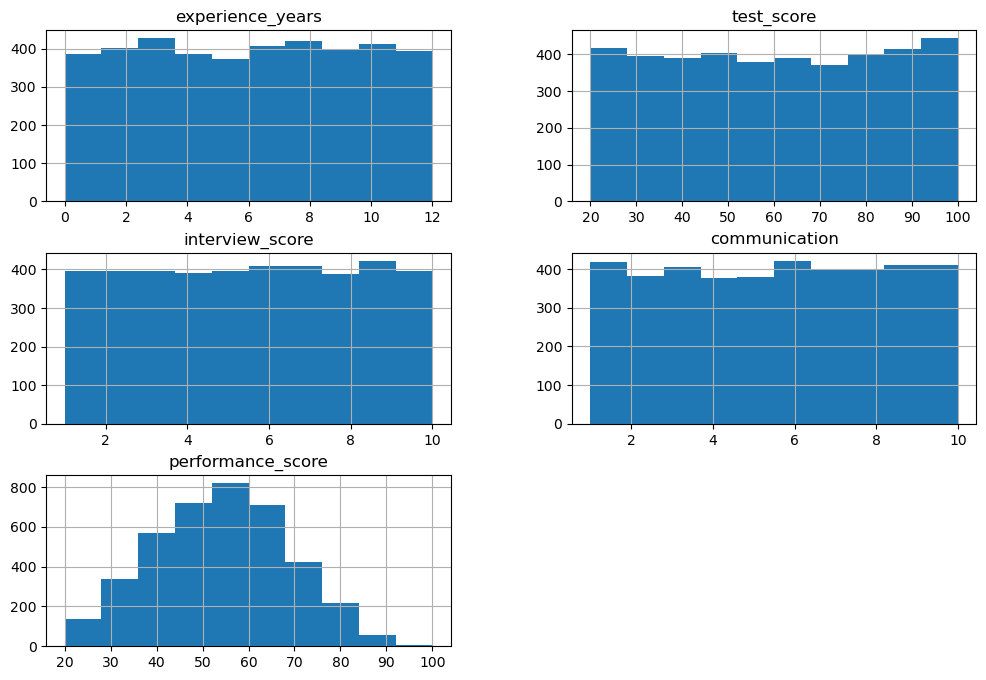

In [159]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.hist(figsize=(12, 8))
plt.show()

In [160]:
# Correlation Matrix
corr_matrix = numeric_cols.corr()
corr_matrix

,experience_years,test_score,interview_score,communication,performance_score
experience_years,1.000000,-0.012370,-0.019462,0.013699,0.162647
test_score,-0.012370,1.000000,0.014132,-0.019450,0.708430
interview_score,-0.019462,0.014132,1.000000,-0.006002,0.392505
communication,0.013699,-0.019450,-0.006002,1.000000,0.376544
performance_score,0.162647,0.708430,0.392505,0.376544,1.000000


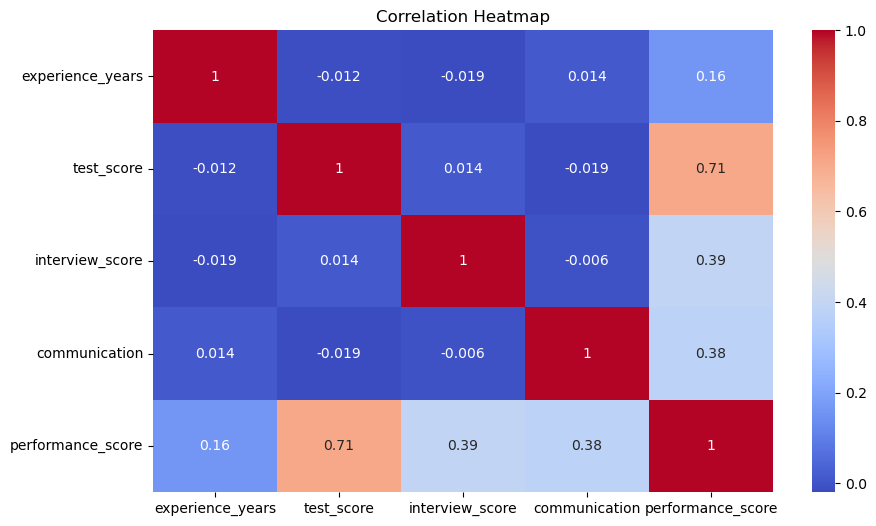

In [161]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [162]:
# Degree wise performance
df.groupby('degree')['performance_score'].mean().sort_values(ascending=False)

degree
MBA       54.300296
B.Tech    54.101449
BCA       53.872146
M.Tech    53.528244
B.Sc      53.073969
MCA       52.568659
Name: performance_score, dtype: float64

In [163]:
# City wise performance
df.groupby('city')['performance_score'].mean().sort_values(ascending=False)

city
Kolkata      54.207358
Pune         53.774869
Bangalore    53.556338
Chennai      53.515539
Delhi        53.415541
Hyderabad    53.300172
Mumbai       53.293135
Name: performance_score, dtype: float64

In [164]:
# Application Source wise performance
df.groupby('application_source')['performance_score'].mean().sort_values(ascending=False)

application_source
Indeed      54.077764
Referral    54.059949
Campus      53.571947
Website     53.397878
LinkedIn    52.817734
Name: performance_score, dtype: float64

In [165]:
# Hobby wise performance
df.groupby('hobby')['performance_score'].mean().sort_values(ascending=False)

hobby
Travel         54.343598
Photography    54.122239
Reading        54.063142
Gaming         53.708397
Music          52.731167
Sports         52.632417
Name: performance_score, dtype: float64

In [166]:
# Preffered Language wise performance
df.groupby('preferred_language')['performance_score'].mean().sort_values(ascending=False)

preferred_language
French     54.308685
Spanish    53.827446
Hindi      53.780206
English    53.243437
German     52.758794
Name: performance_score, dtype: float64

In [167]:
# Data Prepration for Regression Models
numeric_cols_reg = numeric_cols.columns.tolist()
target_col_reg = "performance_score"
numeric_cols_reg = [col for col in numeric_cols_reg if col != target_col_reg]

X_reg = df[numeric_cols_reg]
y_reg = df[target_col_reg]

In [168]:
# Train-Test Split(80:20)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size = 0.2, random_state = 42
                          )

In [169]:
# Linear Regression:
reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)

y_reg_pred = reg_model.predict(X_reg_test)

print("MAE", mean_absolute_error(y_reg_test, y_reg_pred))
print("MSE", mean_squared_error(y_reg_test, y_reg_pred))
print("RMSE", np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)))
print("R2 Score", r2_score(y_reg_test, y_reg_pred))

MAE 4.88537892202125
MSE 36.87060076981141
RMSE 6.072116663060041
R2 Score 0.8278013725876925


In [170]:
joblib.dump(reg_model, "reg_model.pkl")

['reg_model.pkl']

In [171]:
# Coefficients for Linear Regression:
coef_df = pd.DataFrame({
    "Feature": X_reg.columns,
    "Coefficient": model.coef_
})
coef_df

,Feature,Coefficient
0,experience_years,0.742755
1,test_score,0.442509
2,interview_score,1.972252
3,communication,1.961012


In [172]:
# Since the hire_decision column is in object type So for Classification, I will have to change it to (0 for Reject), (1 for Hold) and (2 for Hire)
mapping = {
    "Reject": 0,
    "Hold": 1,
    "Hire": 2
}
df["hire_decision_encoded"] = df["hire_decision"].map(mapping)

In [173]:
# Data Prepration for Classification Models:
numeric_cols_clf = numeric_cols.columns.tolist()
target_col_clf = "hire_decision_encoded"
numeric_cols_clf = [col for col in numeric_cols_clf if col != target_col_clf]

X_clf = df[numeric_cols_clf]
y_clf = df[target_col_clf]

In [174]:
# Train-Test Split(80:20)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size = 0.2, random_state = 42
                          )

KNN Accuracy: 0.95875

KNN Classification Report:
              precision    recall  f1-score   support

  Reject (0)       0.97      0.96      0.97       306
    Hold (1)       0.95      0.96      0.96       373
    Hire (2)       0.94      0.96      0.95       121

    accuracy                           0.96       800
   macro avg       0.95      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



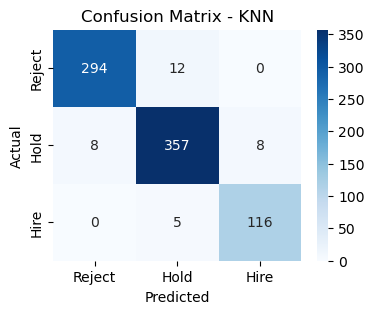

In [175]:
# K-Nearest Neighbors (KNN):
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_clf_train, y_clf_train)
y_pred_knn = knn_model.predict(X_clf_test)

print("KNN Accuracy:", accuracy_score(y_clf_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(
    y_clf_test, y_pred_knn,
    target_names=["Reject (0)", "Hold (1)", "Hire (2)"]
))

# Confusion Matrix for KNN:
cm_knn = confusion_matrix(y_clf_test, y_pred_knn)
plt.figure(figsize=(4,3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Reject", "Hold", "Hire"],
            yticklabels=["Reject", "Hold", "Hire"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [176]:
joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']

Decision Tree Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

  Reject (0)       1.00      1.00      1.00       306
    Hold (1)       1.00      1.00      1.00       373
    Hire (2)       1.00      1.00      1.00       121

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



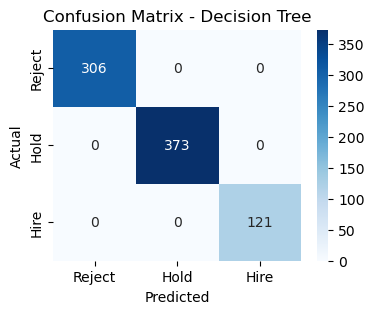

In [177]:
# Decision Tree:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_clf_train, y_clf_train)
y_pred_dt = dt_model.predict(X_clf_test)

print("Decision Tree Accuracy:", accuracy_score(y_clf_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(
    y_clf_test, y_pred_dt,
    target_names=["Reject (0)", "Hold (1)", "Hire (2)"]
))

# Confusion Matrix for Decision Tree:
cm_dt = confusion_matrix(y_clf_test, y_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Reject", "Hold", "Hire"],
            yticklabels=["Reject", "Hold", "Hire"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [178]:
joblib.dump(dt_model, "dt_model.pkl")

['dt_model.pkl']

SVM Accuracy: 0.97625

SVM Classification Report:
              precision    recall  f1-score   support

  Reject (0)       0.98      0.97      0.98       306
    Hold (1)       0.96      0.99      0.97       373
    Hire (2)       1.00      0.95      0.97       121

    accuracy                           0.98       800
   macro avg       0.98      0.97      0.98       800
weighted avg       0.98      0.98      0.98       800



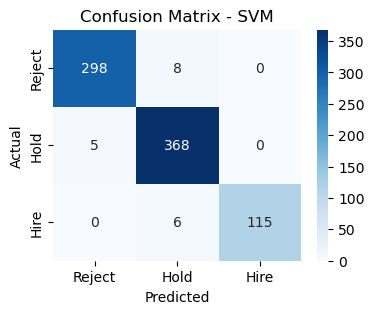

In [179]:
# Support Vector Machine:
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_clf_train, y_clf_train)
y_pred_svm = svm_model.predict(X_clf_test)

print("SVM Accuracy:", accuracy_score(y_clf_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(
    y_clf_test, y_pred_svm,
    target_names=["Reject (0)", "Hold (1)", "Hire (2)"]
))

# Confusion Matrix for SVM:
cm_svm = confusion_matrix(y_clf_test, y_pred_svm)
plt.figure(figsize=(4,3))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Reject", "Hold", "Hire"],
            yticklabels=["Reject", "Hold", "Hire"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [180]:
joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

Naive Bayes Accuracy: 0.9375

Naive Bayes Classification Report:
              precision    recall  f1-score   support

  Reject (0)       0.93      0.94      0.94       306
    Hold (1)       0.94      0.93      0.93       373
    Hire (2)       0.95      0.96      0.95       121

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



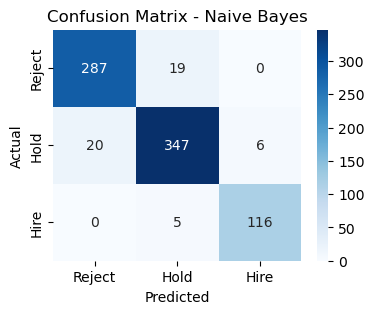

In [181]:
# Naive Byes:
nb_model = GaussianNB()
nb_model.fit(X_clf_train, y_clf_train)
y_pred_nb = nb_model.predict(X_clf_test)

print("Naive Bayes Accuracy:", accuracy_score(y_clf_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(
    y_clf_test, y_pred_nb,
    target_names=["Reject (0)", "Hold (1)", "Hire (2)"]
))

# Confusion Matrix for Naive Byes:
cm_nb = confusion_matrix(y_clf_test, y_pred_nb)
plt.figure(figsize=(4,3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Reject", "Hold", "Hire"],
            yticklabels=["Reject", "Hold", "Hire"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [182]:
joblib.dump(nb_model, "nb_model.pkl")

['nb_model.pkl']

Logistic Regression Accuracy: 1.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

  Reject (0)       1.00      1.00      1.00       306
    Hold (1)       1.00      1.00      1.00       373
    Hire (2)       1.00      1.00      1.00       121

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



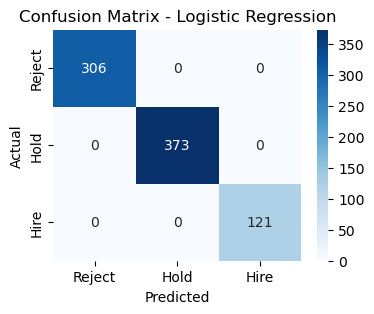

In [183]:
# Logistic Regression (Multiclass):
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_clf_train, y_clf_train)
y_pred_log = log_model.predict(X_clf_test)

print("Logistic Regression Accuracy:", accuracy_score(y_clf_test, y_pred_log))
print("\nLogistic Regression Classification Report:")
print(classification_report(
    y_clf_test, y_pred_log,
    target_names=["Reject (0)", "Hold (1)", "Hire (2)"]
))

# Confusion Matrix for Logistic Regression (Multiclass):
cm_log = confusion_matrix(y_clf_test, y_pred_log)
plt.figure(figsize=(4,3))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Reject", "Hold", "Hire"],
            yticklabels=["Reject", "Hold", "Hire"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [184]:
joblib.dump(log_model, "log_model.pkl")

['log_model.pkl']